In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Datasets

In [ ]:
import numpy as np
import pandas as pd

foursquareusers = pd.read_csv("gdrive/My Drive/Data_Privacy_Project/foursquareusers.csv")
twitterusers = pd.read_csv("gdrive/My Drive/Data_Privacy_Project/twitterusers.csv")
tipofuser = pd.read_csv("gdrive/My Drive/Data_Privacy_Project/tipofuser.csv")
tweetofuser = pd.read_csv("gdrive/My Drive/Data_Privacy_Project/tweetofuser.csv")
foursquareusers['gender'].value_counts()

male      2060
female    1618
none        79
Name: gender, dtype: int64

In [ ]:
tweetofuser['id'].unique()

array([2.76933262e+08, 4.31885042e+09, 3.58189998e+08, ...,
       4.62424384e+09, 1.62034704e+08, 1.65190956e+08])

In [ ]:
tipofuser

,tipid,foursqr_id,latitude,longitude,shortname,createdat,tiptext,id
0,54aaa07b498e7b8d3a11a65c,88926205,50.003752,36.235087,Academic Building,1420468347,Любимое СД,88926205
1,5666a5bf498eb47b09c52e03,41153902,41.034625,28.980850,Breakfast,1449567679,Menemen=Lades👍🏼,41153902
2,568291ff498ecbfa2b230fa4,41153902,41.035139,28.982186,Bar,1451397631,"Rahatlıktan öleceğiniz bir mekan, kasıntı olma...",41153902
3,568291c8498eb71a54cc021f,41153902,41.025830,28.981174,Eastern European,1451397576,"Bir boşnak böreği yedim, efsane 😇",41153902
4,514d0d27e4b09aa6324d6c51,13173514,19.433933,-99.138073,Tacos,1364004135,Muy buenos los paquetes con consome y agua,13173514
...,...,...,...,...,...,...,...,...
21147,509d3e73e4b09f01846be839,39716249,30.247081,-81.730835,Caribbean,1352482419,The black cake is awesome!!! Cool little place,39716249
21148,5193a4d1498e5d8c6d42da62,39716249,30.266053,-81.732973,Residential,1368630481,Looks nice but terrible place to live....don't...,39716249
21149,50e48e0de4b0f94bf0adecb7,39716249,30.092004,-81.810381,BBQ,1357155853,Better than mr. G,39716249
21150,50c8eb3de4b0dc9105ccc25c,39716249,30.175472,-81.701060,Thai,1355344701,Great food! Prices are good! Warning Thai hot ...,39716249


In [ ]:
foursquareusers['location'].isna().sum().sum()

294

In [ ]:
twitterusers['location'].isna().sum().sum()

935

# Train a model to predict gender using NLTK Library

In [ ]:
# importing libraries
import random
from nltk.corpus import names
import nltk
nltk.download('names')

def gender_features(word):
	return {'last_letter':word[-1]}

# preparing a list of examples and corresponding class labels.
labeled_names = ([(name, 'male') for name in names.words('male.txt')]+
			[(name, 'female') for name in names.words('female.txt')])

random.shuffle(labeled_names)

# we use the feature extractor to process the names data.
featuresets = [(gender_features(n), gender)
			for (n, gender)in labeled_names]

# Divide the resulting list of feature
# sets into a training set and a test set.
train_set, test_set = featuresets[500:], featuresets[:500]

# The training set is used to
# train a new "naive Bayes" classifier.
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(classifier.classify(gender_features('mahavir')))

# output should be 'male'
print(nltk.classify.accuracy(classifier, test_set))

# it shows accuracy of our classifier and
# train_set. which must be more than 99 %
# classifier.show_most_informative_features(10)


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
male
0.752


In [ ]:
classifier.prob_classify(gender_features('Moon')).prob("female")

0.442911494359113

In [ ]:
foursquareusers

,id,description,firstname,gender,lastname,location,profilephotolink
0,105891898,So far so good if you always be with me.,Niniyninot,female,NaN,NaN,https://irs1.4sqi.net/img/user/300x300/1058918...
1,148607967,NaN,Beam,female,'Ncp,"Bangkok, Thailand",https://irs1.4sqi.net/img/user/300x300/1486079...
2,138849211,Sky,Tawan,female,NaN,"Bangkok, Thailand",https://irs1.4sqi.net/img/user/300x300/1388492...
3,88926205,NaN,Sofia,female,Kuznetsova,"Украина,Харьков",https://irs3.4sqi.net/img/user/300x300/8892620...
4,41153902,NaN,Seyit,male,Demir,İstanbul,https://irs3.4sqi.net/img/user/300x300/4115390...
...,...,...,...,...,...,...,...
3752,29126939,NaN,Gattopardo,male,Anziano,diano marina Imperia,https://irs0.4sqi.net/img/user/300x300/P2SNOEZ...
3753,6663197,NaN,Hena,male,IR,"Depok, Indonesia",https://irs0.4sqi.net/img/user/300x300/QNRZWU2...
3754,28892499,NaN,Puteri,female,Dalilah,Kedah,https://irs3.4sqi.net/img/user/300x300/A1RDDNE...
3755,28692969,NaN,Vincent,male,Micco,"Rutherford, NJ",https://irs0.4sqi.net/img/user/300x300/XXC5HKV...


#Only keep users' language is English

In [ ]:
# twitterusers_en = twitterusers[twitterusers['language']=='en']
# twitterusers_en = twitterusers_en.reset_index(drop=True)
twitterusers_en = twitterusers
twitterusers_en = twitterusers_en.reset_index(drop=True)
# df = pd.merge(twitterusers_en, foursquareusers, left_on=='foursqr_id', right_on='id')
df = twitterusers_en.merge(foursquareusers, left_on='foursqr_id', right_on='id')
df['gender_y'].value_counts()

male      2060
female    1618
none        79
Name: gender_y, dtype: int64

Infer the gender vector for each user using pre-trained gender prediction model

In [ ]:
df['Twitter_Gender'] = ''
df['Foursquare_Gender'] = ''
df

,id_x,fistlogin,freetext,gender_x,groundtruth,language,lastactivity,lasttweet,location_x,name,...,foursqr_id,id_y,description,firstname,gender_y,lastname,location_y,profilephotolink,Twitter_Gender,Foursquare_Gender
0,2.769333e+08,1301916128000,"| Masih belasan lapan, kau sabar tunggu aku pu...",NotKnown,1,en,1464177655000,With @_xqraxufa (at @TGVCinemas in Johor Bahru...,NaN,ninini,...,105891898,105891898,So far so good if you always be with me.,Niniyninot,female,NaN,NaN,https://irs1.4sqi.net/img/user/300x300/1058918...,,
1,4.318850e+09,1448807868000,since1997 ig:b.nchp,NotKnown,1,th,1464177655000,I'm at Beamily👑💄💋 https://t.co/acv2UMyKIm,NaN,บอบีมบวม,...,148607967,148607967,NaN,Beam,female,'Ncp,"Bangkok, Thailand",https://irs1.4sqi.net/img/user/300x300/1486079...,,
2,3.581900e+08,1313764773000,Girls' Generation | ❤️Choi Sooyoung | cactus i...,NotKnown,1,en,1464177655000,"I'm at Swensen's in Bang Khen, Bangkok https:/...","Manhattan, NY",PEZ,...,138849211,138849211,Sky,Tawan,female,NaN,"Bangkok, Thailand",https://irs1.4sqi.net/img/user/300x300/1388492...,,
3,4.022629e+08,1320091520000,something clever,NotKnown,1,ru,1464177656000,I'm at Shishka https://t.co/P3pY2JW8pe,Харьков,SONYÁ,...,88926205,88926205,NaN,Sofia,female,Kuznetsova,"Украина,Харьков",https://irs3.4sqi.net/img/user/300x300/8892620...,,
4,9.113464e+08,1351468299000,NaN,NotKnown,1,tr,1464177659000,I'm at Cup Of Joy in İstanbul https://t.co/P6C...,"Beyoğlu,GALATASARAY",Seyit DEMİR,...,41153902,41153902,NaN,Seyit,male,Demir,İstanbul,https://irs3.4sqi.net/img/user/300x300/4115390...,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,4.398147e+08,1324191769000,NaN,NotKnown,0,en,1466021295000,RT @8Fact_Footballl: #FRA and #ALB dancing tog...,GGMU,reus,...,29126939,29126939,NaN,Gattopardo,male,Anziano,diano marina Imperia,https://irs0.4sqi.net/img/user/300x300/P2SNOEZ...,,
3753,3.236060e+09,1433422581000,#16 ⚽️❤️,Female,0,en,1466021295000,RT @17Seniors: honestly hate the school part b...,"Maumelle, AR",Arlett Danyelle,...,6663197,6663197,NaN,Hena,male,IR,"Depok, Indonesia",https://irs0.4sqi.net/img/user/300x300/QNRZWU2...,,
3754,6.173317e+08,1340560398000,#Free10 #FreeFranko,NotKnown,0,en,1466021285000,RT @Corey_Bender: This 2018 QB (6-5/212) out o...,"Tallahassee, FL",#C9OE,...,28892499,28892499,NaN,Puteri,female,Dalilah,Kedah,https://irs3.4sqi.net/img/user/300x300/A1RDDNE...,,
3755,5.594239e+08,1335005800000,#Collectibles About #NFL #Football #Team Cleve...,NotKnown,0,en,1466021289000,#NFL #Football Cleveland #Browns Mens Large #T...,"Cleveland, OH",ClevelandBrowns Mall,...,28692969,28692969,NaN,Vincent,male,Micco,"Rutherford, NJ",https://irs0.4sqi.net/img/user/300x300/XXC5HKV...,,


In [ ]:
df['gender_y'][1000]=='none'

False

In [ ]:
for i in range(df.shape[0]):
  if df['gender_y'][i]=='none':
    username = df['firstname'][i]
    prob_male = classifier.prob_classify(gender_features(username)).prob("male")
    df['Foursquare_Gender'][i] = [prob_male, 1-prob_male]

    username = df['screenname'][i]
    prob_male = classifier.prob_classify(gender_features(username)).prob("male")
    df['Twitter_Gender'][i] = [prob_male, 1-prob_male]
  else:
    if df['gender_y'][i]=='male':
      df['Foursquare_Gender'][i] = [1, 0]
      df['Twitter_Gender'][i] = [1, 0]
    elif df['gender_y'][i]=='female':
      df['Foursquare_Gender'][i] = [0, 1]
      df['Twitter_Gender'][i] = [0, 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/pyth

In [ ]:
for i in range(df.shape[0]):
  username = df['firstname'][i]
  prob_male = classifier.prob_classify(gender_features(username)).prob("male")
  df['Foursquare_Gender'][i] = [prob_male, 1-prob_male]

  username = df['screenname'][i]
  prob_male = classifier.prob_classify(gender_features(username)).prob("male")
  df['Twitter_Gender'][i] = [prob_male, 1-prob_male]

df

In [ ]:
df

,id_x,fistlogin,freetext,gender_x,groundtruth,language,lastactivity,lasttweet,location_x,name,...,foursqr_id,id_y,description,firstname,gender_y,lastname,location_y,profilephotolink,Twitter_Gender,Foursquare_Gender
0,2.769333e+08,1301916128000,"| Masih belasan lapan, kau sabar tunggu aku pu...",NotKnown,1,en,1464177655000,With @_xqraxufa (at @TGVCinemas in Johor Bahru...,NaN,ninini,...,105891898,105891898,So far so good if you always be with me.,Niniyninot,female,NaN,NaN,https://irs1.4sqi.net/img/user/300x300/1058918...,"[0, 1]","[0, 1]"
1,4.318850e+09,1448807868000,since1997 ig:b.nchp,NotKnown,1,th,1464177655000,I'm at Beamily👑💄💋 https://t.co/acv2UMyKIm,NaN,บอบีมบวม,...,148607967,148607967,NaN,Beam,female,'Ncp,"Bangkok, Thailand",https://irs1.4sqi.net/img/user/300x300/1486079...,"[0, 1]","[0, 1]"
2,3.581900e+08,1313764773000,Girls' Generation | ❤️Choi Sooyoung | cactus i...,NotKnown,1,en,1464177655000,"I'm at Swensen's in Bang Khen, Bangkok https:/...","Manhattan, NY",PEZ,...,138849211,138849211,Sky,Tawan,female,NaN,"Bangkok, Thailand",https://irs1.4sqi.net/img/user/300x300/1388492...,"[0, 1]","[0, 1]"
3,4.022629e+08,1320091520000,something clever,NotKnown,1,ru,1464177656000,I'm at Shishka https://t.co/P3pY2JW8pe,Харьков,SONYÁ,...,88926205,88926205,NaN,Sofia,female,Kuznetsova,"Украина,Харьков",https://irs3.4sqi.net/img/user/300x300/8892620...,"[0, 1]","[0, 1]"
4,9.113464e+08,1351468299000,NaN,NotKnown,1,tr,1464177659000,I'm at Cup Of Joy in İstanbul https://t.co/P6C...,"Beyoğlu,GALATASARAY",Seyit DEMİR,...,41153902,41153902,NaN,Seyit,male,Demir,İstanbul,https://irs3.4sqi.net/img/user/300x300/4115390...,"[1, 0]","[1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,4.398147e+08,1324191769000,NaN,NotKnown,0,en,1466021295000,RT @8Fact_Footballl: #FRA and #ALB dancing tog...,GGMU,reus,...,29126939,29126939,NaN,Gattopardo,male,Anziano,diano marina Imperia,https://irs0.4sqi.net/img/user/300x300/P2SNOEZ...,"[1, 0]","[1, 0]"
3753,3.236060e+09,1433422581000,#16 ⚽️❤️,Female,0,en,1466021295000,RT @17Seniors: honestly hate the school part b...,"Maumelle, AR",Arlett Danyelle,...,6663197,6663197,NaN,Hena,male,IR,"Depok, Indonesia",https://irs0.4sqi.net/img/user/300x300/QNRZWU2...,"[1, 0]","[1, 0]"
3754,6.173317e+08,1340560398000,#Free10 #FreeFranko,NotKnown,0,en,1466021285000,RT @Corey_Bender: This 2018 QB (6-5/212) out o...,"Tallahassee, FL",#C9OE,...,28892499,28892499,NaN,Puteri,female,Dalilah,Kedah,https://irs3.4sqi.net/img/user/300x300/A1RDDNE...,"[0, 1]","[0, 1]"
3755,5.594239e+08,1335005800000,#Collectibles About #NFL #Football #Team Cleve...,NotKnown,0,en,1466021289000,#NFL #Football Cleveland #Browns Mens Large #T...,"Cleveland, OH",ClevelandBrowns Mall,...,28692969,28692969,NaN,Vincent,male,Micco,"Rutherford, NJ",https://irs0.4sqi.net/img/user/300x300/XXC5HKV...,"[1, 0]","[1, 0]"


#Now, we produce gender similarity matrix




In [ ]:
list1 = [0.4995356183249708, 0.5004643816750292]
list2 = [0.13053615892845685, 0.8694638410715432]
dist = np.linalg.norm(np.array(list1)-np.array(list2))
dist

0.5218440399868902

In [ ]:
n = df.shape[0]
gender_similarity = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    list1 = df['Twitter_Gender'][i]
    list2 = df['Foursquare_Gender'][j]
    sim = np.linalg.norm(np.array(list1)-np.array(list2))
    gender_similarity[i][j] = sim

gender_similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 1.41421356,
        1.41421356],
       [0.        , 0.        , 0.        , ..., 0.        , 1.41421356,
        1.41421356],
       [0.        , 0.        , 0.        , ..., 0.        , 1.41421356,
        1.41421356],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.41421356,
        1.41421356],
       [1.41421356, 1.41421356, 1.41421356, ..., 1.41421356, 0.        ,
        0.        ],
       [1.41421356, 1.41421356, 1.41421356, ..., 1.41421356, 0.        ,
        0.        ]])

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Data_Privacy_Project/gender_similarity.csv'
with open(path, 'w') as f:
  pd.DataFrame(gender_similarity).to_csv(f)

Mounted at /content/drive


In [ ]:
new = gender_similarity[0:100]
new[:,0:100]

array([[0.        , 0.20931784, 0.95148614, ..., 0.07082661, 0.26729622,
        0.76825424],
       [0.20931784, 0.        , 0.7421683 , ..., 0.13849122, 0.05797838,
        0.55893641],
       [0.41095733, 0.62027516, 1.36244346, ..., 0.48178394, 0.67825355,
        1.17921157],
       ...,
       [0.26340703, 0.47272486, 1.21489316, ..., 0.33423364, 0.53070325,
        1.03166127],
       [0.26729622, 0.05797838, 0.68418992, ..., 0.19646961, 0.        ,
        0.50095802],
       [0.26729622, 0.05797838, 0.68418992, ..., 0.19646961, 0.        ,
        0.50095802]])

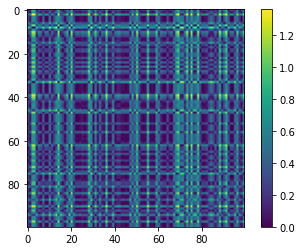

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(new[:,0:100])
plt.colorbar()
plt.show()